# Gradient Boosting and Random Forest examples

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data Split
from sklearn.model_selection import train_test_split

# Model implementation
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier

# Model analysis metrics
# Classifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Regressor
from sklearn.metrics import mean_squared_error, r2_score

# Save models into a file
import pickle

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

/Users/rob/.conda/envs/main/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Magic command:
%matplotlib notebook

## Classifier (XGBoost)

Documentation:
https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [3]:
# Read the CSV file with pandas
data = pd.read_pickle("ensemble-algorithms.pkl")

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["median_house_value"] = data.target
df["median_house_value_larger_than3"] = (df["median_house_value"] > 3).astype(int)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value,median_house_value_larger_than3
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1


In [5]:
drop_columns = [
    'median_house_value_larger_than3',
    'median_house_value'
]
x = df.drop(drop_columns, axis=1)
y = df["median_house_value_larger_than3"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.5, stratify=y, random_state=1)

In [6]:
# Delcare an instance of the random forest classifier (read documentation and feel free
# to experiment with the parameters)
gradient_boosting_cls = XGBClassifier(
    n_estimators=4000,
    learning_rate=0.01,
    max_depth=5,
    scale_pos_weight=1
)

gradient_boosting_cls.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=4000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [7]:
predictions = gradient_boosting_cls.predict(xtest)

print(f"Accuracy on test set:{round(gradient_boosting_cls.score(xtest,ytest),2)}")
print(classification_report(ytest,predictions ))

Accuracy on test set:0.93
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8402
           1       0.85      0.76      0.81      1918

    accuracy                           0.93     10320
   macro avg       0.90      0.87      0.88     10320
weighted avg       0.93      0.93      0.93     10320



<IPython.core.display.Javascript object>


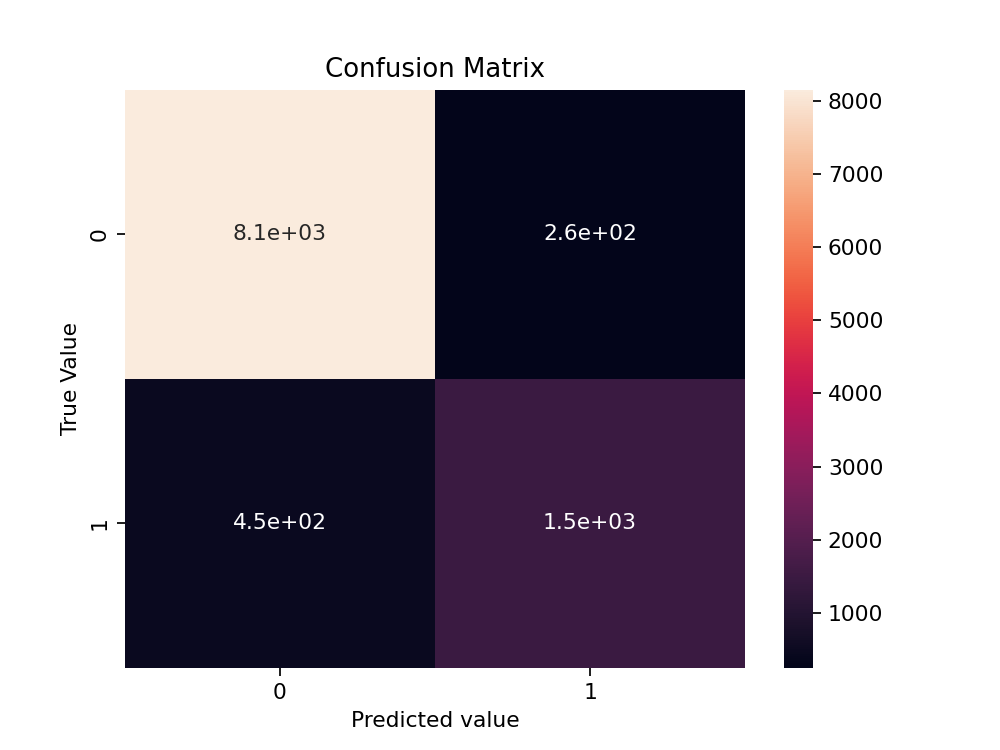

In [8]:
predictions = gradient_boosting_cls.predict(xtest)
plt.figure()
confusion_mat = confusion_matrix(ytest, predictions)
sns.heatmap(confusion_mat,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Value')
plt.xlabel('Predicted value')
plt.show()

<IPython.core.display.Javascript object>


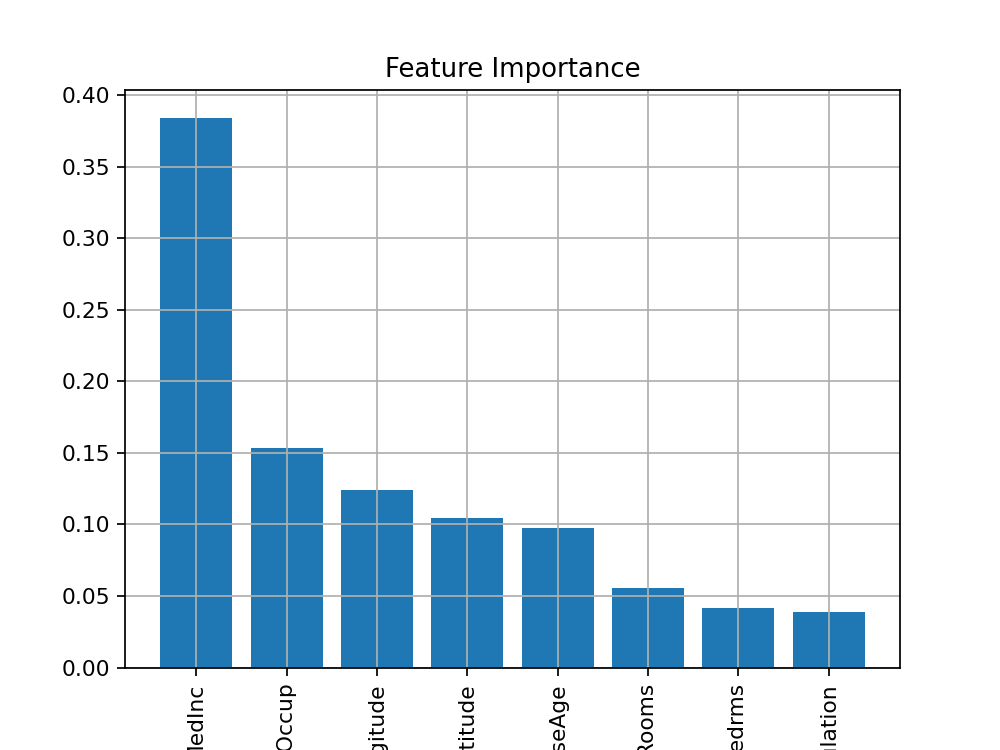

In [9]:
# Determine the feature importance
imp = pd.Series({x.columns[i]:gradient_boosting_cls.feature_importances_[i]
                 for i in range(len(x.columns))}).sort_values(ascending=False)

plt.figure()
plt.bar(imp.index, imp)
plt.title("Feature Importance")
plt.grid()
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>


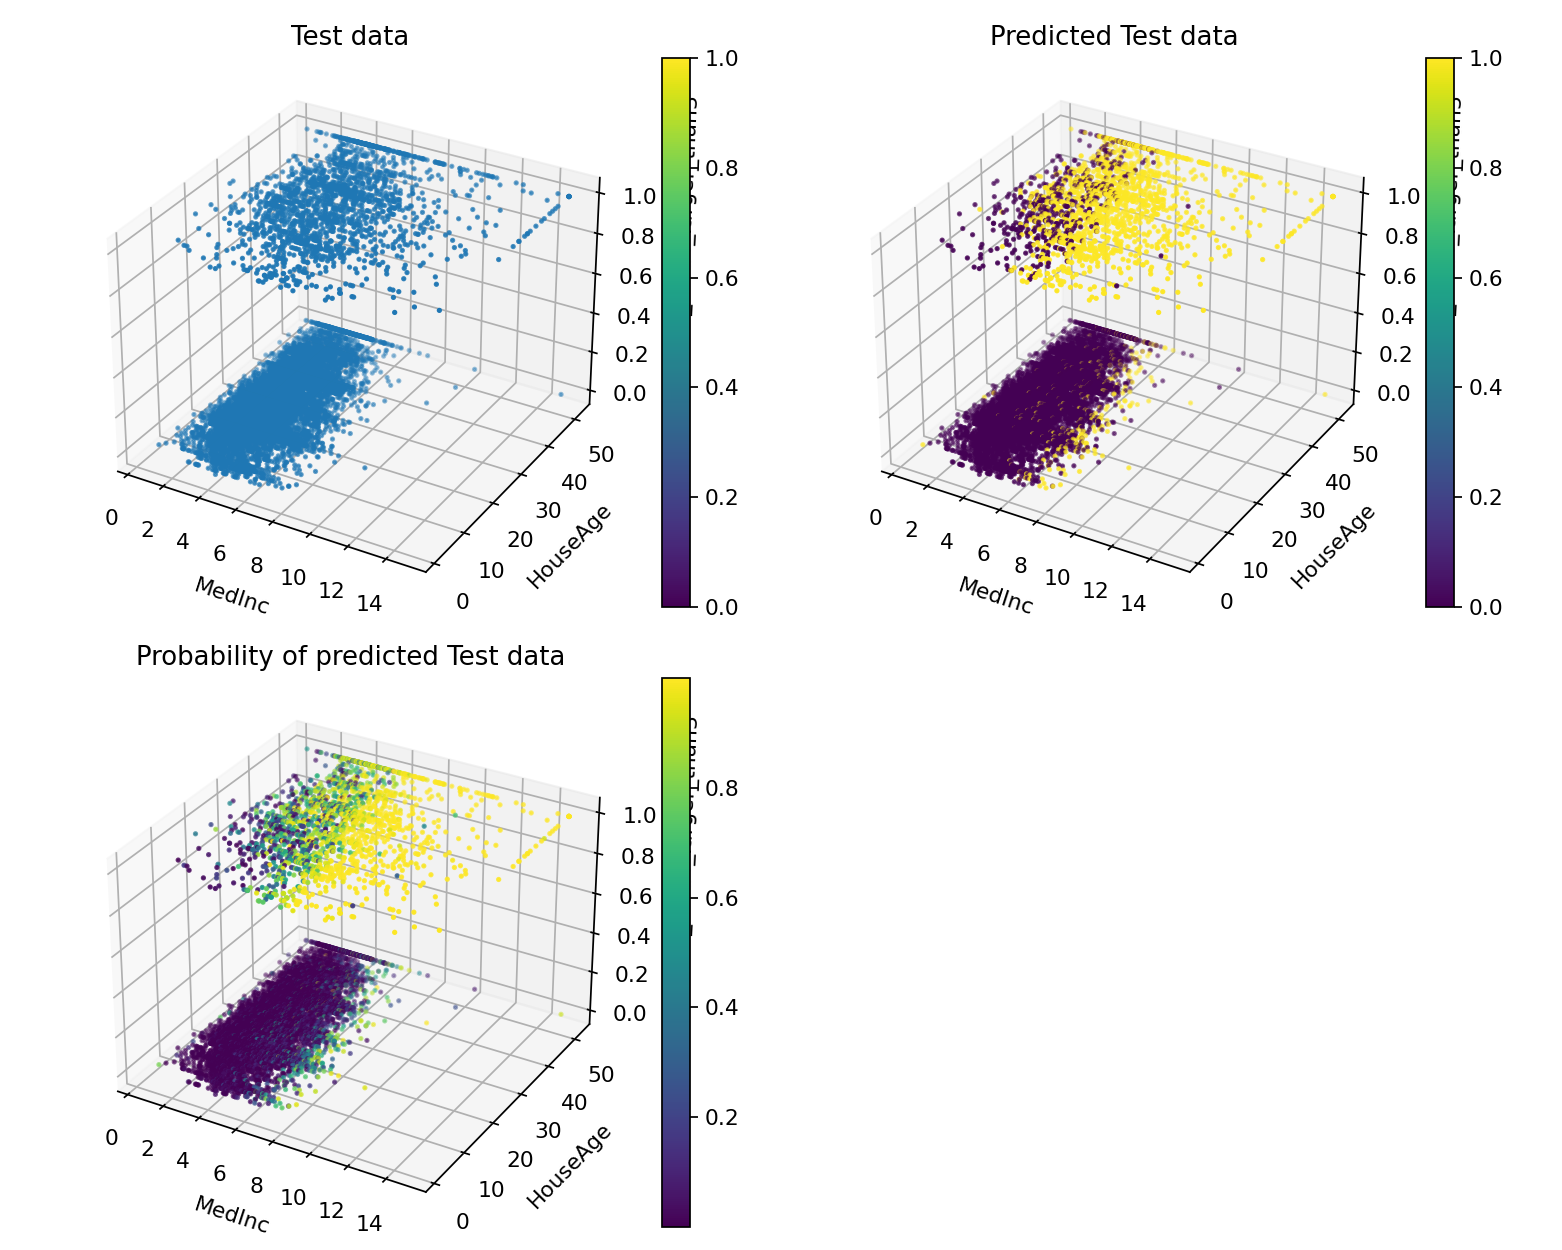

In [10]:
# 3D visualization
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(221, projection='3d')
p = ax.scatter(xtest.MedInc, xtest.HouseAge, ytest, s=2)
fig.colorbar(p)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value_larger_than3")
plt.title("Test data")

ax = fig.add_subplot(222, projection='3d')
p = ax.scatter(xtest.MedInc, xtest.HouseAge, ytest, c=gradient_boosting_cls.predict(xtest), s=2)
fig.colorbar(p)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value_larger_than3")
plt.title("Predicted Test data")

ax = fig.add_subplot(223,projection='3d')
p = ax.scatter(xtest.MedInc, xtest.HouseAge, ytest, c=gradient_boosting_cls.predict_proba(xtest)[:,1], s=2)
fig.colorbar(p)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value_larger_than3")
plt.title("Probability of predicted Test data")


plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


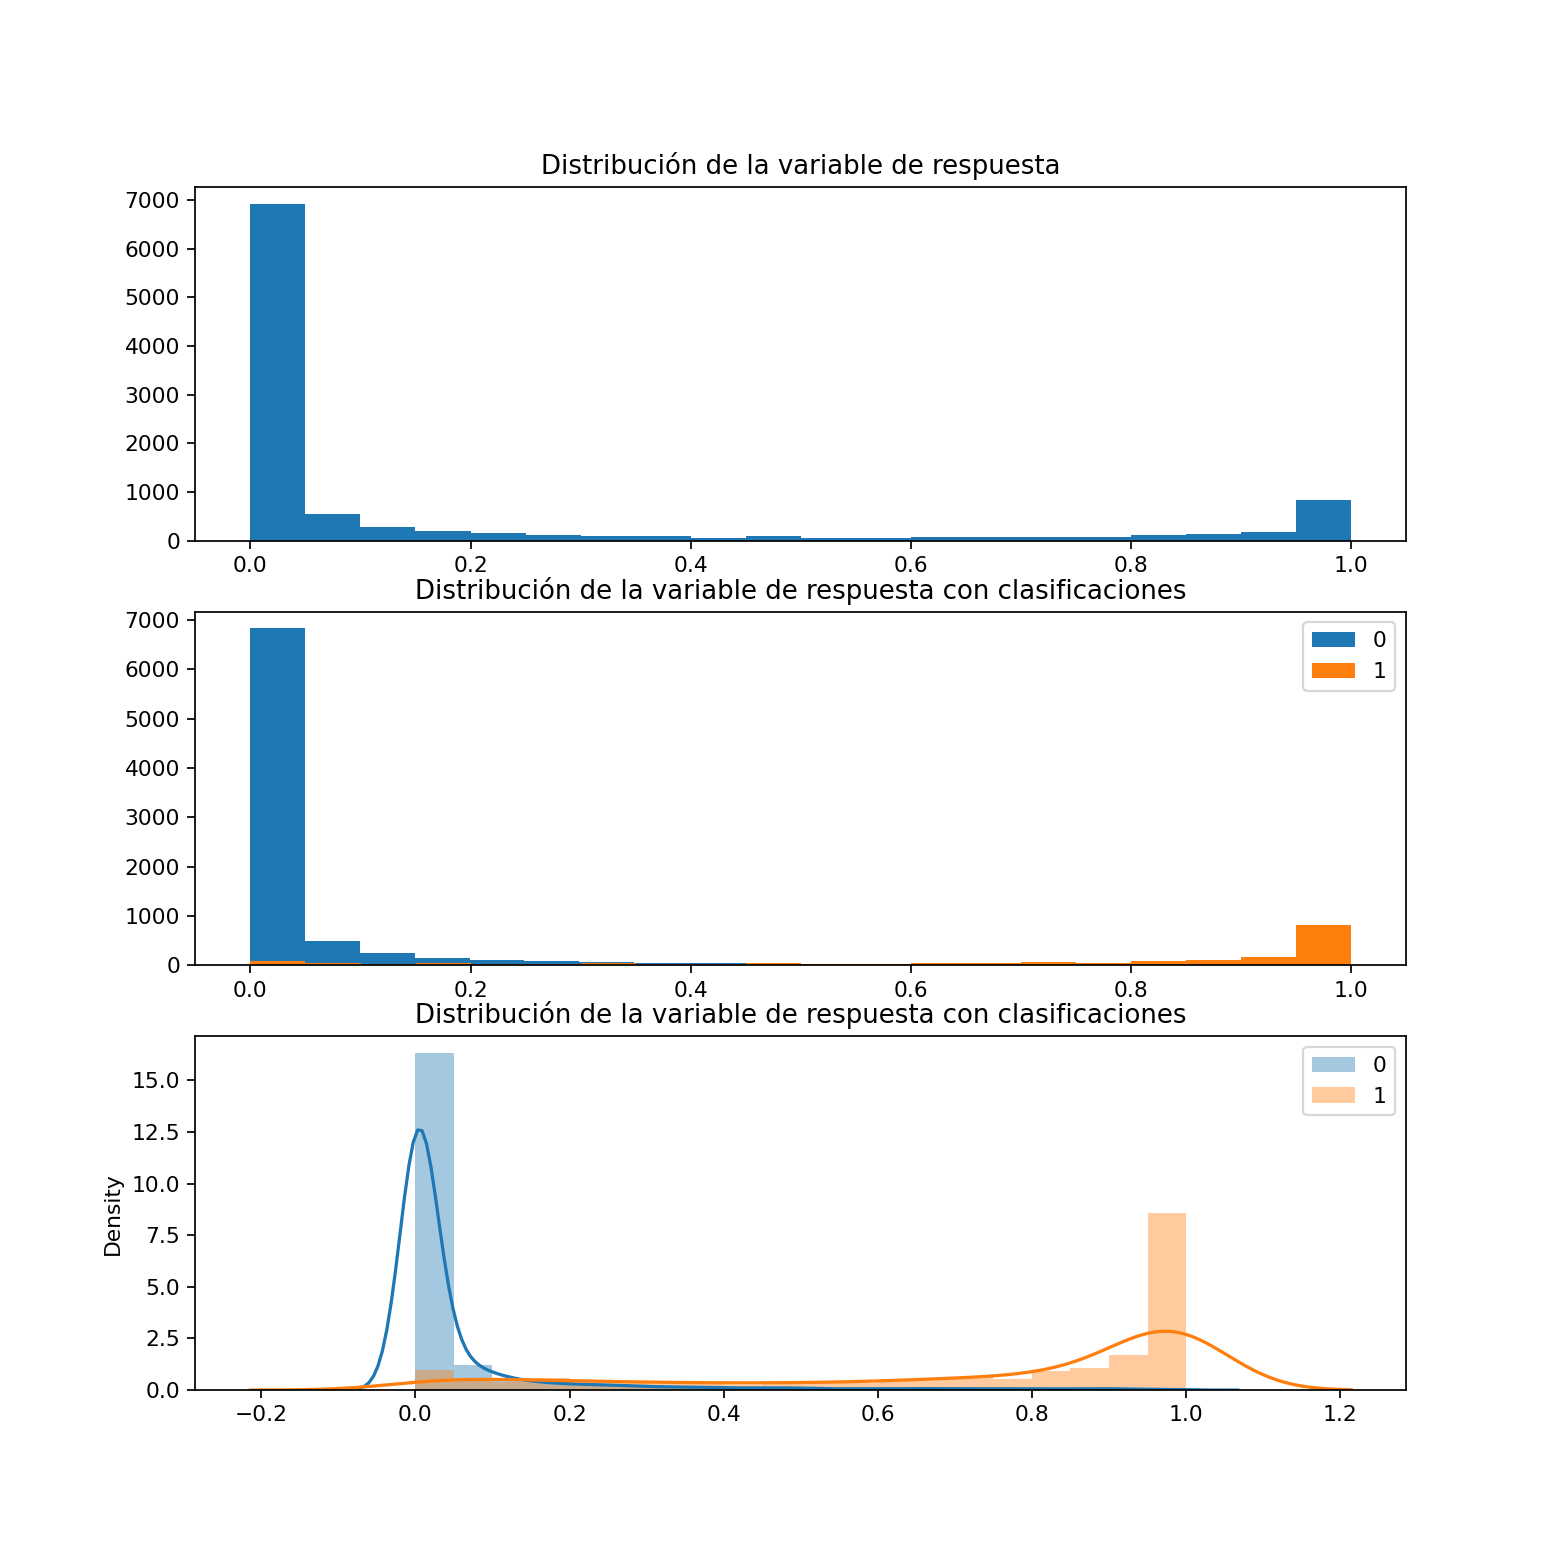

/mnt/c/Users/dhdzm/Documents/proyects/saturdays_ai_gdl4/general_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/mnt/c/Users/dhdzm/Documents/proyects/saturdays_ai_gdl4/general_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [11]:
#sns.distplot()
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.title('Distribución de la variable de respuesta')
plt.hist(gradient_boosting_cls.predict_proba(xtest)[:,1], bins=20)
plt.subplot(312)
plt.title('Distribución de la variable de respuesta con clasificaciones')
plt.hist(gradient_boosting_cls.predict_proba(xtest[ytest==0])[:,1], bins=20, label='0')
plt.hist(gradient_boosting_cls.predict_proba(xtest[ytest==1])[:,1], bins=20, label='1')
plt.legend()
plt.subplot(313)
plt.title('Distribución de la variable de respuesta con clasificaciones')
sns.distplot(gradient_boosting_cls.predict_proba(xtest[ytest==0])[:,1], bins=20, label='0')
sns.distplot(gradient_boosting_cls.predict_proba(xtest[ytest==1])[:,1], bins=20, label='1')
plt.legend()
plt.show()
plt.show()

## Random Forest Regressor

Documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [12]:
# Select the features for the model (all the features)
drop_columns = [
    'median_house_value_larger_than3',
    'median_house_value'
]
x = df.drop(drop_columns, axis=1)
y = df["median_house_value"]

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=9)

In [13]:
# Create an instance of the Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100)

# Fit the data to the random forest regressor model (train the model)
random_forest_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [14]:
# Predict the values
predictions = random_forest_reg.predict(X_test)

<IPython.core.display.Javascript object>


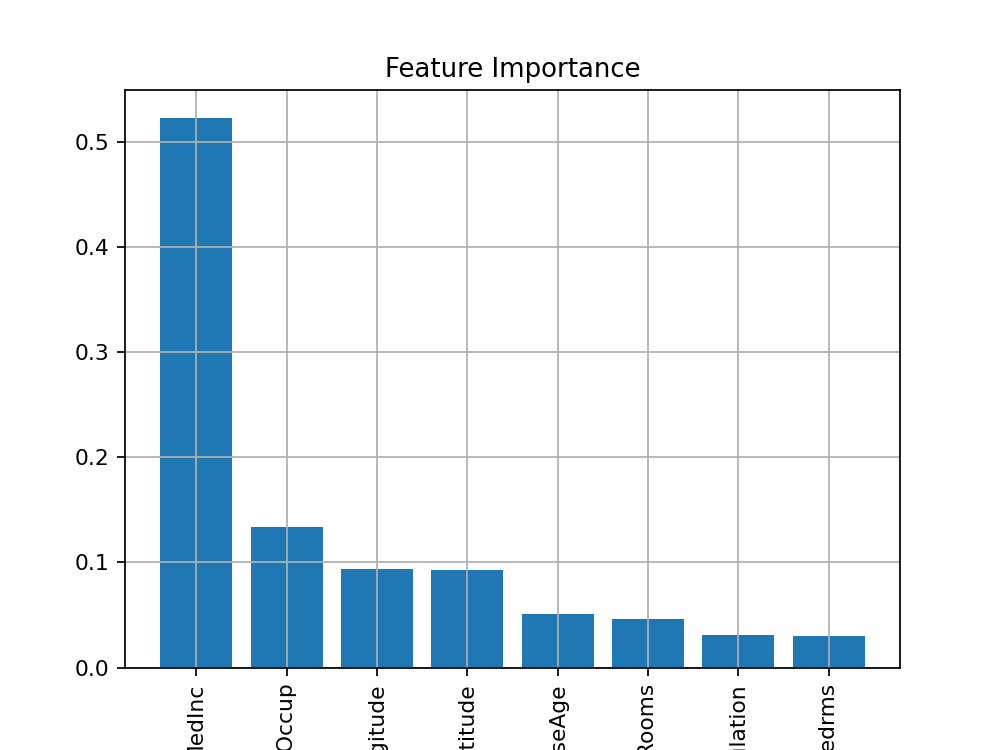

In [15]:
# Determine the importance
imp = pd.Series(
    {x.columns[i]:random_forest_reg.feature_importances_[i] for i in range(len(x.columns))}).sort_values(ascending=False)

plt.figure()
plt.bar(imp.index, imp)
plt.title("Feature Importance")
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [16]:
# To determine the performance of the model we can use some metrics

# Square root of the mean squared error:
test_rmse = np.sqrt(mean_squared_error(Y_test, predictions))

# Determination coeficient (R2)
test_r2sc = r2_score(Y_test,predictions)

# Remember the lower the value is the better it is
print("Square root of the mean squared error",test_rmse)

# The closer to one the better
print("Determination Coeficient",test_r2sc)

Square root of the mean squared error 0.49920433627321686
Determination Coeficient 0.8144804833905515


<IPython.core.display.Javascript object>


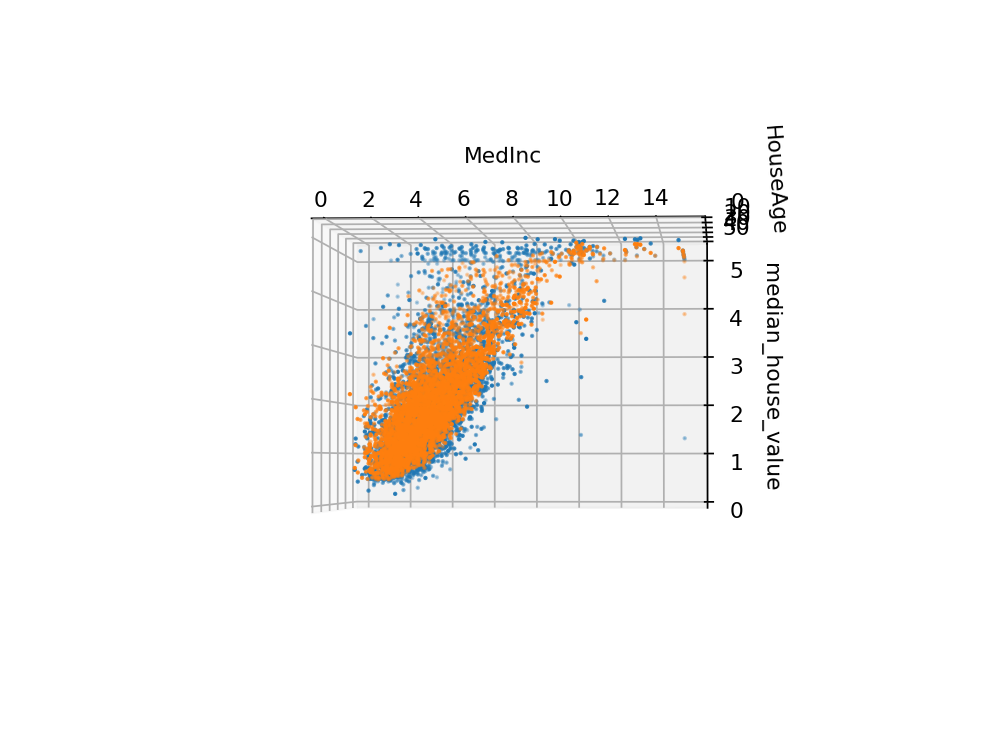

In [17]:
# 3D visualization

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_test.MedInc,X_test.HouseAge, Y_test, s=1)
ax.scatter(X_test.MedInc, X_test.HouseAge, random_forest_reg.predict(X_test), s=1, cmap="YlOrRd")

ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value")
plt.show()
